In [162]:
import scipy as sp
from scipy import linalg
from scipy import optimize
import numpy as np
from numpy import array
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sympy as sm
sm.init_printing(use_unicode=True)
from scipy.stats import norm # normal distribution

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [163]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [164]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital).

In order to solve the model in period 2 we need to maximize the utility for the worker in period two, which corresponds to finding $v_2$:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

Apart from the restriction we have that human capital in period 2 is constructed as:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

We achieve this by performing list operations in the following code, which creates lists for every variable:

In [165]:
#We create empty lists:

h2w=[]
h2nw=[]
c2w1=[]
c2w0=[]
c2nw1=[]
c2nw0=[]
v2w1=[]
v2w0=[]
v2nw1=[]
v2nw0=[]

# We create a list for h2 for l1=1 and l1=0:

for h1 in h_vec:
    h2_w = h1 + 1 + 0.5*Delta
    h2_nw= h1 + 0.5*Delta
    h2w.append(h2_w)
    h2nw.append(h2_nw)

# We create a list for c2 for l2=1 and l2=0 assuming l1=1:

for h2_w in h2w:
    c2_w1 = w * h2_w
    c2_w0 = b
    c2w1.append(c2_w1)
    c2w0.append(c2_w0)

# We create a list for c2 for l2=1 and l2=0 assuming l1=0:

for h2_nw in h2nw:
    c2_nw1 = w * h2_nw * 1
    c2_nw0 = b
    c2nw1.append(c2_nw1)
    c2nw0.append(c2_nw0)

# We create a list of the utility for period 2 for l2=1 and l2=0 assuming l1=1:

for c2_w1 in c2w1:
    v2_w1 = (c2_w1**(1-rho))/(1-rho)-gamma*1
    v2w1.append(v2_w1)

for c2_w0 in c2w0:
    v2_w0 = (c2_w0**(1-rho))/(1-rho)-gamma*0
    v2w0.append(v2_w0)

# We create a list of the utility for period 2 for l2=1 and l2=0 assuming l1=0:

for c2_nw1 in c2nw1:
    v2_nw1 = (c2_nw1**(1-rho))/(1-rho)-gamma*1
    v2nw1.append(v2_nw1)

for c2_nw0 in c2nw0:
    v2_nw0 = (c2_nw0**(1-rho))/(1-rho)-gamma*0
    v2nw0.append(v2_nw0)

The plot for the utility in period 2 is shown in figure 1 further down in question 1, where all the plots are shown in order to have a better overview. Below you have all four combinations shown in figure 1:

$$
\begin{eqnarray*}
\text{(a)} \quad l_1=1 & \text{ and} & l_2=1 \\
\text{(b)} \quad l_1=0 & \text{ and} & l_2=1 \\
\text{(c)} \quad l_1=1 & \text{ and} & l_2=0 \\
\text{(d)} \quad l_1=0 & \text{ and} & l_2=0 \\
\end{eqnarray*}
$$

Where (c) and (d) give the exact same output, since $l_2=0$ makes consumption equal to unemployment benefits in both instances.

We will now create a list that shows the optimal utility in period 2 and the corresponding movement of the labor in period 2:

In [166]:
# We define the differenses in order to see a graph for v2:

diffnw= [v2nw0_i - v2nw1_i for v2nw0_i, v2nw1_i in zip(v2nw0, v2nw1)]
diffw= [v2w0_i - v2w1_i for v2w0_i, v2w1_i in zip(v2w0, v2w1)]

# We create empty list:

v2optw=[]
v2optnw=[]
l2nw=[]
l2w=[]

# We create a list showing the optimal utility in period 2, v2 (figure 2):

v2optw= [max(v2w0_i,v2w1_i) for v2w0_i, v2w1_i in zip(v2w0, v2w1)]
v2optnw= [max(v2nw0_i,v2nw1_i) for v2nw0_i, v2nw1_i in zip(v2nw0, v2nw1)]

# We create a list showing the optimal labor in period 2 for l1=1 (figure 3):

for be in diffw:
    if be<0:
        labor = 1
    if be>=0:
        labor = 0
    l2w.append(labor)

# We create a list showing the optimal labor in period 2 for l1=0 (figure 4):

for ae in diffnw:
    if ae<0:
        labo = 1
    if ae>=0:
        labo = 0
    l2nw.append(labo)

We are now able to create the plots showing the results:

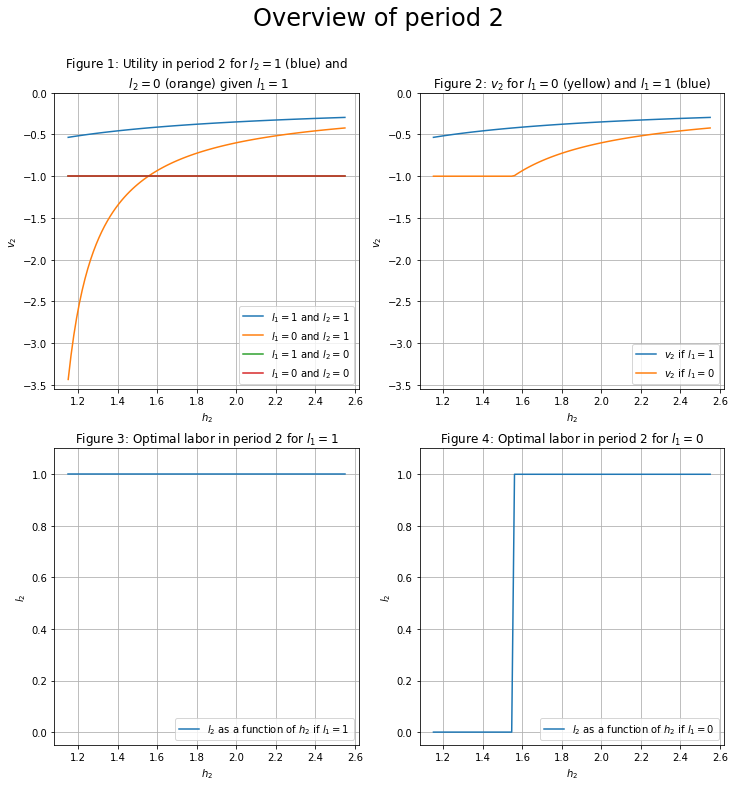

In [167]:
# We create a figure for all the plots, which we call 'Overview of period 2'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Overview of period 2', fontsize=24)

# Figure 1
# We plot the utility in period 2 for all four combinations:
ax1.set_title('Figure 1: Utility in period 2 for $l_2=1$ (blue) and \n $l_2=0$ (orange) given $l_1=1$')
ax1.set_ylabel("$v_2$")
ax1.set_xlabel("$h_2$")
ax1.plot(h2w, v2w1, label = '$l_1=1$ and $l_2=1$')
ax1.plot(h2w,v2nw1, label = '$l_1=0$ and $l_2=1$')
ax1.plot(h2w, v2w0, label = '$l_1=1$ and $l_2=0$')
ax1.plot(h2w, v2nw0, label = '$l_1=0$ and $l_2=0$')
ax1.set_ylim([-3.55,0])
ax1.legend(loc=4)
ax1.grid()

# Figure 2
# We plot the function for optimal utility in period 2, v2, as a function of h2 for l1=1 and l1=0:
ax2.set_title('Figure 2: $v_2$ for $l_1=0$ (yellow) and $l_1=1$ (blue)')
ax2.set_ylabel("$v_2$")
ax2.set_xlabel("$h_2$")
ax2.plot(h2w, v2optw, label = '$v_2$ if $l_1=1$')
ax2.plot(h2w, v2optnw, label = '$v_2$ if $l_1=0$')
ax2.set_ylim([-3.55,0])
ax2.legend(loc=4)
ax2.grid()

# Figure 3
# We plot labor in period 2 as a function of human capital in period 2, assuming l1=1:
ax3.set_title("Figure 3: Optimal labor in period 2 for $l_1=1$")
ax3.set_ylabel("$l_2$")
ax3.set_xlabel("$h_2$")
ax3.plot(h2w, l2w, label = '$l_2$ as a function of $h_2$ if $l_1=1$')
ax3.set_ylim([-0.05,1.1])
ax3.legend(loc=4)
ax3.grid()

# Figure 4
# We plot labor in period 2 as a function of human capital in period 2, assuming l1=0:
ax4.set_title("Figure 4: Optimal labor in period 2 for $l_1=0$")
ax4.set_ylabel("$l_2$")
ax4.set_xlabel("$h_2$")
ax4.plot(h2w, l2nw, label = '$l_2$ as a function of $h_2$ if $l_1=0$')
ax4.set_ylim([-0.05,1.1])
ax4.legend(loc=4)
ax4.grid()

fig.set_figheight(12)
fig.set_figwidth(12)

In figure 1 we see the utility for all four combinations mentioned above, where we see that situation (c) and (d) are the exact same as mentions above.

In order to maximize the utility (find $v_2$) we create two list, that represent $v_2$ for $l_1=1$ and $l_1=0$. To find $v_2$ for $l_1=1$ we take the maximum value for situation (a) (blue) and situation (c) (green), which correspond to the blue curve in figure 2. To find $v_2$ for $l_1=0$ we take the maximum value for situation (b) (yellow) and situation (d) (red), which correspond to the yellow curve in figure 2. In figure 2 we see that ony the yellow curve has a kink, which is caused by the change in laborparticipation.

In figure 3 and figure 4 we see the plot for labor in period 2 as a function of human capital in period 2 for $l_1=1$ and $l_1=0$, respectively. 

In figure 3 we see, that the worker maximizes his utility by working in the second period, given that he/she also worked in the first period independet of the human capital level in period 2. 

In figure 4 we see, that the worker will change behaviour for different values of human capital assuming he/she did not work in the first period. We see, that for human capital values below ca. $1.55$ in the second period the worker will maximize utility by only recieving unemployment benefits in period 2, and that he/she will maxime utility by working in period 2 for human capital values above or equal to ca. $1.55$.

Below we now find the value for the human capital in period 2, that makes working in period 2 prefereable given $l_1=0$:

In [168]:
# We find the value for h2, which makes working in period 2 preferable:

zipped = list(zip(l2nw, h2w))

number1 = []

for i,x in zipped:
    number = x
    
    number1.append(number)
    
    if i == 1:
        break
    
print(number1[-1])

1.56010101010101


We find, that for $l_1=1$ the worker preferes to work in period 2 independently of his human capital level, if we on the other hand assume that $l_1=0$, then we find that it is only preferable to work for workers with a human capital in period 2 that is equal to or greater than $1.56$.

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital).

In order to solve the model in period 1 we need to maximize the utility for the worker in period one, which corresponds to finding $v_1$:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the discount factor and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the expected value of living in period two.

We achieve this by performing list operations in the following code, which creates lists for every variable. In order to get a better overview of the results, we insert all the variables in the same figure, whereafter we comment on the different figures.

In [169]:
# We create empty lists:

c1w=[]
c1nw=[]
v1w=[]
v1nw=[]

# We create a list for c1 for l1=1 and l1=0:

for h1 in h_vec:
    c1_w=w*h1*1
    c1_nw = b
    c1w.append(c1_w)
    c1nw.append(c1_nw)

# We create a list of the utility in period 1 for l1=1 and l1=0 (figure 5):

v1w = [(c1_w**(1-rho))/(1-rho)-gamma*1+beta*v2opt_w for c1_w, v2opt_w in zip(c1w, v2optw)]
v1nw = [(c1_nw**(1-rho))/(1-rho)-gamma*0+beta*v2opt_nw for c1_nw, v2opt_nw in zip(c1nw, v2optnw)]

# We are now able to plot the utility in period 1 for l1=1 and l1=0, which we do in figure 5.

In [170]:
# We define the differenses in order to see a graph for v1:

diffp1= [v1nw_i - v1w_i for v1w_i, v1nw_i in zip(v1w, v1nw)]

# We create empty list:

v1opt=[]
l1opt=[]

# We create a list showing the optimal utility in period 1, v1 (figure 6):

v1opt= [max(v1w_i,v1nw_i) for v1w_i, v1nw_i in zip(v1w, v1nw)]

# We create a list showing the optimal labor in period 1 (figure 7):

for l1op in diffp1:
    if l1op<0:
        labor = 1
    if l1op>=0:
        labor = 0
    l1opt.append(labor)

We now create the plots, that shows the results for period 1:

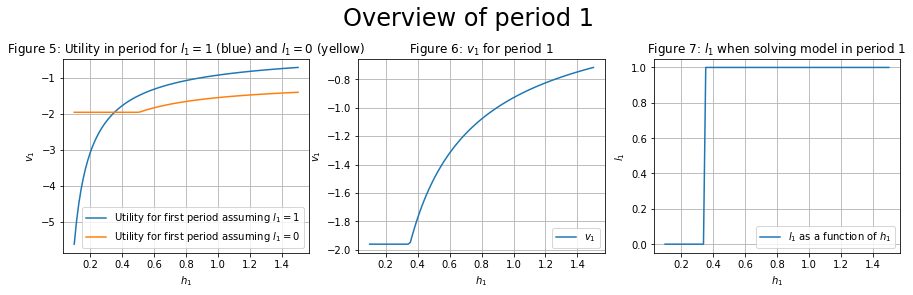

In [171]:
# We create a figure for all the plots, which we call 'Overview of period 1'

fig2, (ax5, ax6, ax7) = plt.subplots(1,3, figsize=(15,4))
fig2.suptitle('Overview of period 1', fontsize=24)
fig2.subplots_adjust(top=0.8)

# Figure 5
# We plot the ultility in period 1 for l1=1 and l1=0:
ax5.set_title('Figure 5: Utility in period for $l_1=1$ (blue) and $l_1=0$ (yellow)')
ax5.set_ylabel("$v_1$")
ax5.set_xlabel("$h_1$")
ax5.plot(h_vec,v1w, label = 'Utility for first period assuming $l_1=1$')
ax5.plot(h_vec,v1nw, label = 'Utility for first period assuming $l_1=0$')
ax5.legend(loc=4)
ax5.grid()

# Figure 6
# We plot the function for optimal utility in period 1, v1, as a function of h1:
ax6.set_title("Figure 6: $v_1$ for period 1")
ax6.set_ylabel("$v_1$")
ax6.set_xlabel("$h_1$")
ax6.plot(h_vec, v1opt, label = '$v_1$')
ax6.legend(loc=4)
ax6.grid()

# Figure 7
# We plot labor in period 1 as a function of human capital in period 1, which maximizes the utility in period 1:
ax7.set_title("Figure 7: $l_1$ when solving model in period 1")
ax7.set_ylabel("$l_1$")
ax7.set_xlabel("$h_1$")
ax7.plot(h_vec, l1opt, label = '$l_1$ as a function of $h_1$')
ax7.legend(loc=4)
ax7.grid()

In figure 5 we see the utility for the two situations; when $l_1=1$ (blue) and when $l_1=0$ (yellow). We see that the curves cross each other, which means that the worker has different preferences regaring labor at different leves of human capital in period 1.

In figure 6 we maximize the utility and thereby solve the model in period 1 wrt. labor in period 1, where we see have that $v_1$ is a combination of the curves in figure 5.

In figure 7 we have the plot for labor in period 1 as a function of human capital in period 1, where we see that the worker maximizes his utility for period 1 by not working if the human capital level in period 1 is below ca. $0.35$. Contrary the worker will prefere to work in period 1 if he has a human capital value that is equal or greater that ca. $0.35$ in period 1.

Below we now find the value for the human capital in period 1, that makes working in period 1 prefereable given $l_1=0$:

In [176]:
# We find the value for h1, which makes working in period 1 preferable:

zipped = list(zip(l1opt, h_vec))

number2 = []

for i,x in zipped:
    numberr = x
    
    number2.append(numberr)
    
    if i == 1:
        break
    
number_2_val = (number2[-1])

print(f'We find, that in period 1 the worker preferes to work if the human capital in period 1 is equal to or greater than {number_2_val:.3f}.')

We find, that in period 1 the worker preferes to work if the human capital in period 1 is equal to or greater than 0.355.


**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

In order to see whether the worker is willing to work for a potential wage income below the unemployment benefits or not, we look at the consumption level in both period 1 and period 2. We do this based on the labor maximization diagrams for both periods. 

In [177]:
# We look at the potential wage income/benefit income in relation with the above restrictions for period 1 (figure 8):

zipped2 = list(zip(diffp1,c1w,c1nw))

ctott2=[]

for a,bw,bnw in zipped2:
    if a<0:
        ctot = bw
    if a>=0:
        ctot = bnw
    ctott2.append(ctot)


# We look at the potential wage income/benefit income in relation with the above restrictions for period 2 (figure 9):
zipped3 = list(zip(l2nw,c2w0,c2nw1))

ctott3=[]

for a, bnw, bw in zipped3:
    if a==0:
        ctot = bnw
    if a==1:
        ctot = bw
    ctott3.append(ctot)

We now plot the graphs and comment below:

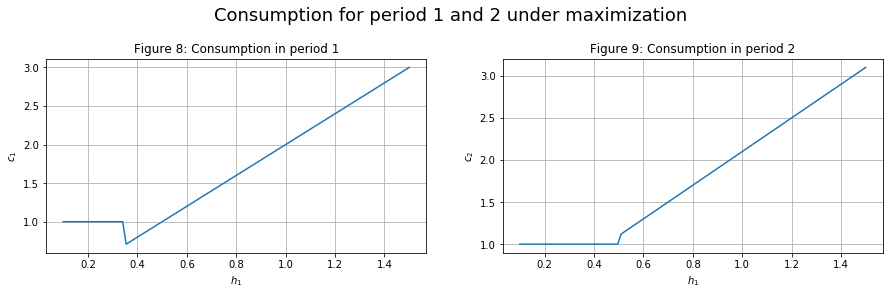

In [178]:
# We create a figure for the two plots:
fig3, (ax8, ax9) = plt.subplots(1,2, figsize=(15,4))
fig3.suptitle('Consumption for period 1 and 2 under maximization', fontsize=18)
fig3.subplots_adjust(top=0.8)

# Figure 8
# Consumption under optimization of utility in period 1:
ax8.set_title('Figure 8: Consumption in period 1')
ax8.set_ylabel("$c_1$")
ax8.set_xlabel("$h_1$")
ax8.plot(h_vec,ctott2)
ax8.grid()

# Figure 9
# Consumption under optimization of utility in period 2:
ax9.set_title('Figure 9: Consumption in period 2')
ax9.set_ylabel("$c_2$")
ax9.set_xlabel("$h_1$")
ax9.plot(h_vec,ctott3)
ax9.grid()

In figure 8 and figure 9 we see the consumption in period 1 and period 2, respectively, where the kink correspons to the human capital value where the worker enters the labormarket.

In figure 9 potential wage income is always above the unemployment benefits in period 2, which is not that interesting since it is expected.

In figure 8 we see that potential wage income is below the unemployment benefits for a human capital level from $0.355$ to ca. $0.5$. This means that the worker is willing to work, even if the potential wage income is below unemployment benefits.

The reason that the worker is willing to work for a potential wage income below the unemployment benefits is, that participation in the labor market gives him additional experience which gives him/her a higher level of human capital level in period 2, and thereby a higer utility all in all.

# 2. AS-AD model

In [230]:
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')
gamma = sm.symbols('gamma')
delta = sm.symbols('delta')
omega = sm.symbols('omega')
v_t=sm.symbols('v_t')
y_t=sm.symbols('y_t')
s_t=sm.symbols('s_t')
pi_t=sm.symbols('\pi_t')
pi_t1=sm.symbols('\pi_{t-1}')
y_t1=sm.symbols('y_{t-1}')
s_t1=sm.symbols('s_{t-1}')

#### Question 1: 

To solve the output gap in equilibrium, we set the AD-curve equal to SRAS-curve:

The equilibrium value of the output gap is:



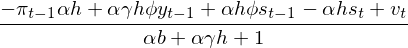

In [231]:
f = (v_t-(1+b*alpha)*y_t)/(h*alpha)
g = pi_t1+gamma*y_t-phi*gamma*y_t1+s_t-phi*s_t1
eq_y = sm.Eq(g,f)
eq_val_y = sm.solve(eq_y,y_t)[0]
print('The equilibrium value of the output gap is:\n')
eq_val_y

To solve the output gap in equilibrium, we set the outputgap in equilibirum into the output gap in the AD-curve and isolate the inflation gap as a function of the output gap:

The equilibrium value of the inflation gap is:



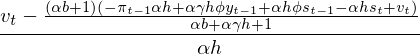

In [232]:
z=(v_t-h*alpha*pi_t)/(1+b*alpha)
eq_val_pi = (v_t-(1+b*alpha)*eq_val_y)/(h*alpha)
print('The equilibrium value of the inflation gap is:\n')
eq_val_pi

Here we insert the parameter values:

In [233]:
alpha = 5.76
h = 0.5
b = 0.5
phi = 0
gamma = 0.075

eq_y2 = sm.Eq((v_t-(1+b*alpha)*y_t)/(h*alpha),pi_t1+gamma*y_t-phi*gamma*y_t1+s_t-phi*s_t1)
eq_val_y2 = sm.solve(eq_y2,y_t)[0]
print('The equilibrium value of the output gap is:\n')
eq_val_y2

The equilibrium value of the output gap is:



In [234]:
eq_val_pi2 = (v_t-(1+b*alpha)*((-pi_t1*alpha*h + alpha*gamma*h*phi*y_t1+alpha*h*phi*s_t1-alpha*h*s_t+v_t)/(alpha*b+alpha*gamma*h+1)))/(h*alpha)
print('The equilibrium value of the inflation gap is:\n')
eq_val_pi2

The equilibrium value of the inflation gap is:



#### Question 2

We now insert our values of the parameters in the equations found in question 1:

In [235]:
# Given values:
pi_t1 = 0
s_t = 0
v_t = 0

# Output gap
eq_y3 = sm.Eq((v_t-(1+b*alpha)*y_t)/(h*alpha),pi_t1+gamma*y_t-phi*gamma*y_t1+s_t-phi*s_t1)
eq_val_y3 = sm.solve(eq_y3,y_t)[0]
print('The equilibrium value of the output gap given inital values is:\n')
eq_val_y3

The equilibrium value of the output gap given inital values is:



In [236]:
eq_val_pi3 = (v_t-(1+b*alpha)*((-pi_t1*alpha*h + alpha*gamma*h*phi*y_t1+alpha*h*phi*s_t1-alpha*h*s_t+v_t)/(alpha*b+alpha*gamma*h+1)))/(h*alpha)
print('The equilibrium value of the inflation gap is:\n')
eq_val_pi3

The equilibrium value of the inflation gap is:



We see, that for the given paramters, output gap and inflation gap will be zero.

Here we illustrate the equilibrium level:

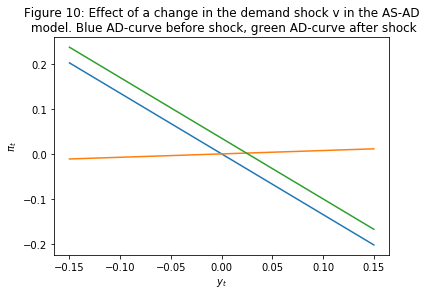

In [237]:
# Here we define different output levels:

output = np.arange(-0.15,0.2,0.1)

# Creating empty boxes:

pi_ad = []
pi_as = []
pi_ad2 = []

for x in output:
    pi1 = (0 - (1 + 0.5*5.76)*x)/(0.5*5.76)
    pi2 = (0 + 0.075*x - 0*0.075*0 + 0 - 0.075*0)
    pi3 = (0.1 - (1 + 0.5*5.76)*x)/(0.5*5.76)
    
    # Adding p1 to the empty box:
    pi_ad.append(pi1)
    pi_as.append(pi2)
    pi_ad2.append(pi3)

plt.title("Figure 10: Effect of a change in the demand shock v in the AS-AD\n model. Blue AD-curve before shock, green AD-curve after shock")
plt.ylabel("$\pi_t$")
plt.xlabel("$y_t$")
plt.plot(output, pi_ad)
plt.plot(output, pi_as)
plt.plot(output, pi_ad2)

Figure 10 shows that when $v_t$ increases to 0.1, then the AD-curve shifts upwards, which leads to and increases in the equilibrium inflation gap and an increases in the output gap.

Output gap when $v_t = 0.1$: 0.0244
Inflation gap when $v_t = 0.1$: 0.0018

##### Question 3:

In [238]:
# Here we create boxes consitisting of the given initial values:
y = [0]
pi = [0]
v = [0]

# First and only shock is added to the array:
shock = [0,0.1]

# The shock is then 0, for the rest of the time:

for x in range(48):
    shock.append(0)

for i,x in enumerate(shock):
    if i > 0:
        new_v = 0.8*v[-1] + x
        v.append(new_v)

for i,x in enumerate(v):
    if i > 0:
        y_new = (-pi[-1]*5.76*0.5 + x)/(5.76*0.5 + 5.76*0.075*0.5 + 1)
        pi_new = (x - ((5.76*0.5+1)*(-pi[-1]*5.76*0.5 + x))/(5.76*0.5 + 5.76*0.075*0.5 + 1))/(5.76*0.5)
        
        y.append(y_new)
        pi.append(pi_new)

Here we plot the dynamics of the economy, when it is hit by a demand shock in period 0:

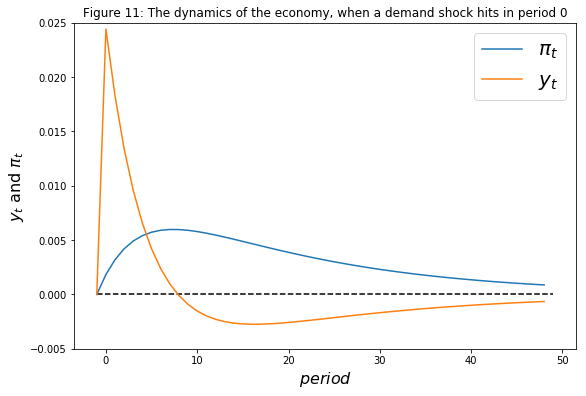

In [239]:
# Here we define the x-axis (time)

time = np.arange(-1,49,1)

# Here the time array is converted into a list:

time.tolist()

fig = plt.figure(figsize=(9,6))
plt.title("Figure 11: The dynamics of the economy, when a demand shock hits in period 0")
plt.ylabel("$y_t$ and $\pi_t$",fontsize=16)
plt.ylim([-0.005,0.025])
plt.xlabel("$period$", fontsize=16)
plt.plot(time, pi, label="$\pi_t$")
plt.plot(time, y, label="$y_t$")
plt.hlines(0,-1,49, linestyle='dashed')
plt.legend(prop={'size': 20})

Figure 11 shows the dynamics of the economy, when a demand shock hits the economy in period 0. We see that the shock leads to an increase in the output gap if around 2,5% in the first period. The output gap slowely convergres back to zero on the long run, as no further shocks hit the economy. What we also see is, that the the inflation gap is positive in the whole period after the shock, and that the output gap becomes negative around period 8. The demand shock only help the economy on the short run.

##### Question 4

In [240]:
np.random.seed(1234)

# Here we create boxes consitisting of the given initial values:
y = [0]
pi = [0]
v = [0]
s = [0]

# Shock to x and c are defined:
shock_x = np.random.normal(loc=0,scale=3.492,size=1000)
shock_c = np.random.normal(loc=0,scale=0.2,size=1000)

for x in shock_x:
    new_v = 0.8*v[-1] + x
    v.append(new_v)

for c in shock_c:
    new_s = 0.15*s[-1] + c
    s.append(new_s)

v = v[1:]
s = s[1:]

# Here the two lists are zipped together:

zipped = list(zip(v,s))
        
for i,x in zipped:
        y_new = (-pi[-1]*5.76*0.5 - 5.76*0.5*x + i)/(5.76*0.5 + 5.76*0.075*0.5 + 1)
        pi_new = (i - ((5.76*0.5+1)*(-pi[-1]*5.76*0.5 - 5.76*0.5*x + i))/(5.76*0.5 + 5.76*0.075*0.5 + 1))/(5.76*0.5)
        
        y.append(y_new)
        pi.append(pi_new)

y = y[1:]
pi = pi[1:]

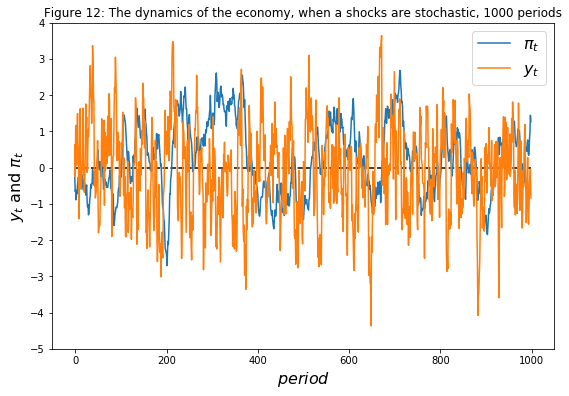

In [241]:
# Here we define the x-axis (time)

time = np.arange(-1,999,1)

# Here the time array is converted into a list:

time.tolist()

fig = plt.figure(figsize=(9,6))
plt.title("Figure 12: The dynamics of the economy, when a shocks are stochastic, 1000 periods")
plt.ylabel("$y_t$ and $\pi_t$",fontsize=16)
plt.ylim([-5,4])
plt.xlabel("$period$", fontsize=16)
plt.plot(time, pi, label="$\pi_t$")
plt.plot(time, y, label="$y_t$")
plt.hlines(0,-1,999, linestyle='dashed')
plt.legend(prop={'size': 16})

Figure 12 shows the dynamics of the economy, when shocks are stochastic for 1,000 periods. It is seen, that the inflation gap and the output gap correlate negatively, as the output gap is positive in periods where the inflation gap is negative.

Here we calcualte the varaince of $y_t$:

In [244]:
print("The variance of the output gap is:")
print(np.var(y))
print("\nThe variance of the inflation gap is:")
print(np.var(pi))
print("\nThe correlation between the output and the inflation gap is:")
print(np.corrcoef(y,pi)[1,0])
print("\nThe auto-correlation between $y_t4$ and $y_{t-1}$ is:")
print(np.corrcoef(y[:-1],y[1:])[1,0])
print("\nThe auto-correlation between $\pi_t$ and $\pi_{t-1}$ is:")
print(np.corrcoef(pi[:-1],pi[1:])[1,0])

The variance of the output gap is:
1.5892204762025377

The variance of the inflation gap is:
0.9823314901233824

The correlation between the output and the inflation gap is:
-0.1060583229947397

The auto-correlation between $y_t4$ and $y_{t-1}$ is:
0.7406756432542131

The auto-correlation between $\pi_t$ and $\pi_{t-1}$ is:
0.97784624786496


We get the following results:

$var(y_t) = 1.58$

$var(\pi_t) = 0.98$

$corr(y_t,\pi_t) = -0.11$

$corr(y_t,y_{t-1} = 0.74$

$corr(\pi_t,\pi_{t-1} = 0.98$

#### Question 5

In [197]:
# Here we create boxes consitisting of initial values:
y = [0]
pi = [0]
v = [0]
s = [0]

# Phi runs from 0 to 1 in 100 steps:

phi_val = np.linspace(0,1,100)

corr = []

for a in phi_val:
    
    np.random.seed(1234)
    
    # Shock to x and c are defined:
    shock_x = np.random.normal(loc=0,scale=3.492,size=1000)
    shock_c = np.random.normal(loc=0,scale=0.2,size=1000)

    for x in shock_x:
        new_v = 0.8*v[-1] + x
        v.append(new_v)

    for c in shock_c:
        new_s = 0.15*s[-1] + c
        s.append(new_s)

    # As we need s_t and s_t-1, we create s2, which consits of the inital s value and the next 1000:
    
    s2 = s[:-1]
    
    # Here we drop the initial values, an keep the next 1000:
    
    v = v[1:]
    s = s[1:]

    # Here the three lists are zipped:

    zipped = list(zip(v,s,s2))

    # Here we use the equations from exc. 2.1 and insert the given parameters:
    
    for i,x,p in zipped:
        y_new = ((-1)*pi[-1]*5.76*0.5 + 5.76*0.075*0.5*a*y[-1] +  5.76*0.5*a*p - 5.76*0.5*x + i)/(5.76*0.5 + 5.76*0.075*0.5 + 1)
        pi_new = (i - ((5.76*0.5 + 1)*(-pi[-1]*5.76*0.5 + 5.76*0.075*0.5*a*y[-1] + 5.76*0.5*a*p - 5.76*0.5*x + i))/(5.76*0.5 + 5.76*0.075*0.5 + 1))/(5.76*0.5)
        
        y.append(y_new)
        pi.append(pi_new)
    
    y = y[1:]
    pi = pi[1:]
    
    # Here we calcualte the correlation between y and pi:
    
    correlation = np.corrcoef(y,pi)[0,1]
    corr.append(correlation)
    
    # Here we reset the initial values:
    
    y = [0]
    pi = [0]
    v = [0]
    s = [0]

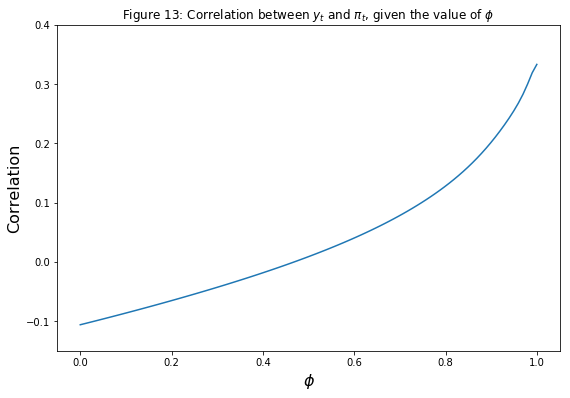

In [198]:
fig = plt.figure(figsize=(9,6))
plt.title("Figure 13: Correlation between $y_t$ and $\pi_t$, given the value of $\phi$")
plt.ylabel("Correlation",fontsize=16)
plt.ylim([-0.15,0.40])
plt.xlabel("$\phi$", fontsize=16)
plt.plot(phi_val, corr)

In figure 13 we see that the correlation between $y_t$ and $\pi_t$ is increasing in $\phi$.

Here we find the optimal $\phi$, so that the correlation between $y_t$ and $\pi_t$ = 0.31:

In [199]:
def g(a):
     # Here we create boxes consitisting of initial values:
    y = [0]
    pi = [0]
    v = [0]
    s = [0]

    corr = []

    np.random.seed(1234)

    # Shock to x and c are defined:
    shock_x = np.random.normal(loc=0,scale=3.492,size=1000)
    shock_c = np.random.normal(loc=0,scale=0.2,size=1000)

    for x in shock_x:
        new_v = 0.8*v[-1] + x
        v.append(new_v)

    for c in shock_c:
        new_s = 0.15*s[-1] + c
        s.append(new_s)

    # As we need s_t and s_t-1, we create s2, which consits of the inital s value and the next 1000:

    s2 = s[:-1]

    # Here we drop the initial values, an keep the next 1000:

    v = v[1:]
    s = s[1:]

    # Here the three lists are zipped:

    zipped = list(zip(v,s,s2))

    # Here we use the equations from exc. 2.1 and insert the given parameters:

    for i,x,p in zipped:
        y_new = ((-1)*pi[-1]*5.76*0.5 + 5.76*0.075*0.5*a*y[-1] +  5.76*0.5*a*p - 5.76*0.5*x + i)/(5.76*0.5 + 5.76*0.075*0.5 + 1)
        pi_new = (i - ((5.76*0.5 + 1)*(-pi[-1]*5.76*0.5 + 5.76*0.075*0.5*a*y[-1] + 5.76*0.5*a*p - 5.76*0.5*x + i))/(5.76*0.5 + 5.76*0.075*0.5 + 1))/(5.76*0.5)

        y.append(y_new)
        pi.append(pi_new)

    y = y[1:]
    pi = pi[1:]

    # Here we calcualte the correlation between y and pi:

    correlation = np.corrcoef(y,pi)[0,1]
    return correlation

In [200]:
# Here we define a function v(a) - 0.31 and find the root of it, as this will give us the a, where the correlation between the 
# output gap and the inflation gap = 0.31.
def v(a):
    return g(a) - 0.31

solver = optimize.brentq(v,0,1)

print(f'The phi that makes the correlation between the output gap and inflation gap = 0.31 is {solver:.3f}.')

The phi that makes the correlation between the output gap and inflation gap = 0.31 is 0.985.


#### Question 6

In [201]:
def j(a,sigma_x,sigma_c):
     # Here we create boxes consitisting of initial values:
    y = [0]
    pi = [0]
    v = [0]
    s = [0]

    corr = []

    np.random.seed(1234)

    # Shock to x and c are defined:
    shock_x = np.random.normal(loc=0,scale=sigma_x,size=1000)
    shock_c = np.random.normal(loc=0,scale=sigma_c,size=1000)

    for x in shock_x:
        new_v = 0.8*v[-1] + x
        v.append(new_v)

    for c in shock_c:
        new_s = 0.15*s[-1] + c
        s.append(new_s)

    # As we need s_t and s_t-1, we create s2, which consits of the inital s value and the next 1000:

    s2 = s[:-1]

    # Here we drop the initial values, an keep the next 1000:

    v = v[1:]
    s = s[1:]

    # Here the three lists are zipped:

    zipped = list(zip(v,s,s2))

    # Here we use the equations from exc. 2.1 and insert the given parameters:

    for i,x,p in zipped:
        y_new = ((-1)*pi[-1]*5.76*0.5 + 5.76*0.075*0.5*a*y[-1] +  5.76*0.5*a*p - 5.76*0.5*x + i)/(5.76*0.5 + 5.76*0.075*0.5 + 1)
        pi_new = (i - ((5.76*0.5 + 1)*(-pi[-1]*5.76*0.5 + 5.76*0.075*0.5*a*y[-1] + 5.76*0.5*a*p - 5.76*0.5*x + i))/(5.76*0.5 + 5.76*0.075*0.5 + 1))/(5.76*0.5)

        y.append(y_new)
        pi.append(pi_new)

    y = y[1:]
    pi = pi[1:]

    # Here we calcualte the correlation between y and pi:

    var_y = np.var(y)
    var_pi = np.var(pi)
    correlation1 = np.corrcoef(y,pi)[0,1]
    correlation2 = np.corrcoef(y[:-1],y[1:])[1,0]
    correlation3 = np.corrcoef(pi[:-1],pi[1:])[1,0]
    US_replica = [var_y, var_pi, correlation1, correlation2, correlation2]
    return US_replica

In [202]:
US_data = [1.64, 0.21, 0.31, 0.84, 0.48]

def h(a,sigma_x,sigma_c):
    return np.subtract(j(a,sigma_x,sigma_c),US_data)

We have managed to create the list above and have failed in trying to finding the values for phi, sigma_x and sigma_c, that replicates the US data.

# 3. Exchange economy

#### In this exercise lecture 4 and problem set 1 has been used as inspiration.

In [203]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

#### Question 1

Text(0.5, 0, 'Budget share')

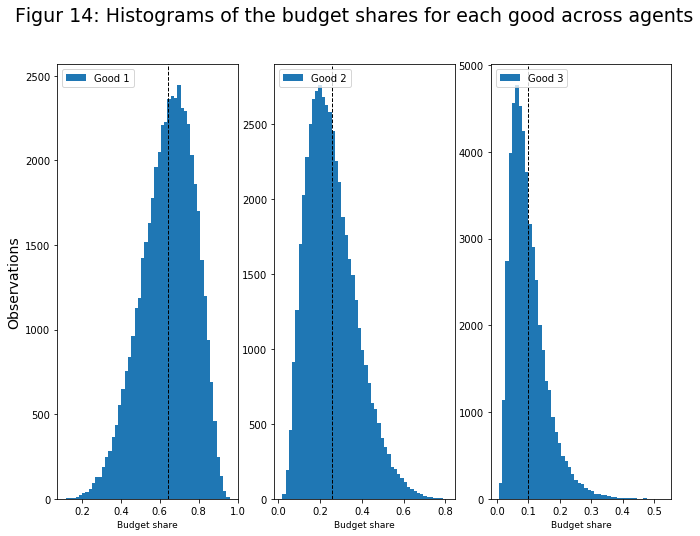

In [205]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(betas[:,0],bins=50,label='Good 1') 
ax2.hist(betas[:,1],bins=50,label='Good 2') 
ax3.hist(betas[:,-1],bins=50,label='Good 3') 
ax1.axvline(betas[:,0].mean(), color='k', linestyle='dashed', linewidth=1)
ax2.axvline(betas[:,1].mean(), color='k', linestyle='dashed', linewidth=1)
ax3.axvline(betas[:,-1].mean(), color='k', linestyle='dashed', linewidth=1)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
fig.suptitle('Figur 14: Histograms of the budget shares for each good across agents', fontsize=19)
ax1.set_ylabel('Observations', fontsize=14)
ax1.set_xlabel('Budget share', fontsize=9)
ax2.set_xlabel('Budget share', fontsize=9)
ax3.set_xlabel('Budget share', fontsize=9)

In figur 14 we see the budget share for each good. We have added a line showing the mean of the share for each good across agents. We see the average share for good 1, 2 and 3 are respectively about 0.65, 0.25, 0.10, which sums to 1.

#### Question 2

Here  we define the demand for good 1, 2 and 3:

In [206]:
def demand_good_1_func(betas,p1,p2,e1,e2,e3):
    I = e1*p1+e2*p2+e3
    return betas[:,0]*I/p1

def demand_good_2_func(betas,p1,p2,e1,e2,e3):
    I = e1*p1+e2*p2+e3
    return betas[:,1]*I/p2

def demand_good_3_func(betas,p1,p2,e1,e2,e3):
    I = e1*p1+e2*p2+e3
    return betas[:,2]*I

Excess demand: \\[ x_1(p_1,p_2) = \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j})-e^{j}_{i} = \beta^{j}_{i}\frac{I^{j}}{p_{i}}-e^{j}_{i} \\]

Finding excess demand, by summing the demand for a good and subtracting the sum of the endowments of the good, that is demand - supply:

In [207]:
def excess_demand_good_1(betas,p1,p2,e1,e2,e3): 
    dist = np.sum(demand_good_1_func(betas,p1,p2,e1,e2,e3))
    total = dist-np.sum(e1)
    return total

def excess_demand_good_2(betas,p1,p2,e1,e2,e3): 
    dist = np.sum(demand_good_2_func(betas,p1,p2,e1,e2,e3)) 
    total = dist-np.sum(e2)
    return total

def excess_demand_good_3(betas,p1,p2,e1,e2,e3): 
    dist = np.sum(demand_good_3_func(betas,p1,p2,e1,e2,e3))
    total = dist-np.sum(e3)
    return total

Excess demand for good 1, 2 and 3 are plotted:

In [208]:
dim = 50
# Prices
p1_vec = np.linspace(0.1,5,dim)
p2_vec = np.linspace(0.1,5,dim)
p3 = 1

# Demand: We create empty boxes, which should be filled with the excess demand, for given prices.
# The dimension is equal to the price vectors, as we have one excess demand for each price:
excess_1 = np.empty((dim,dim))
excess_2 = np.empty((dim,dim))
excess_3 = np.empty((dim,dim))

# To create the grids for our plot, we use the following function taken from problem set 1:
p1_grid, p2_grid = np.meshgrid(p1_vec, p2_vec) 

for i,p1 in enumerate(p1_vec):
    for x,p2 in enumerate(p2_vec):
        excess_1[i,x] = excess_demand_good_1(betas,p1,p2,e1,e2,e3)
        excess_2[i,x] = excess_demand_good_2(betas,p1,p2,e1,e2,e3) 
        excess_3[i,x] = excess_demand_good_3(betas,p1,p2,e1,e2,e3)

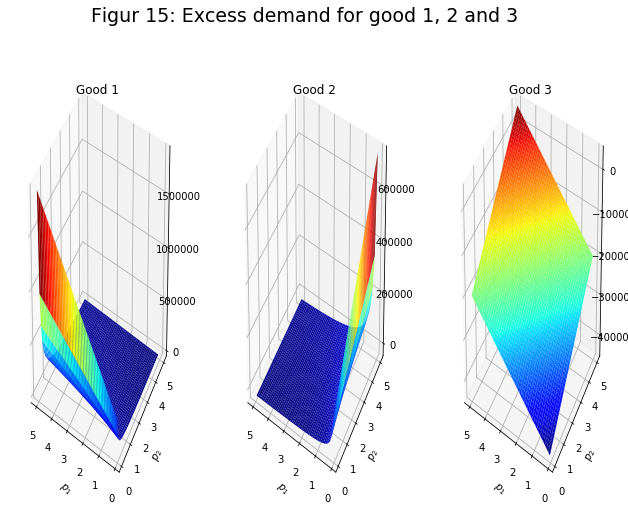

In [210]:
fig = plt.figure(figsize=(11,8))

# Below we invert the x_axis, as these point in the wrong direction.

fig.suptitle('Figur 15: Excess demand for good 1, 2 and 3', fontsize=19)

ax1 = fig.add_subplot(1,3,1,projection='3d')
fig1 = ax1.plot_surface(p1_grid,p2_grid,excess_1, cmap=cm.jet)
ax1.set_title('Good 1')
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$') 
ax1.invert_xaxis()

ax2 = fig.add_subplot(1,3,2,projection='3d')
fig2 = ax2.plot_surface(p1_grid,p2_grid,excess_2, cmap=cm.jet)
ax2.set_title('Good 2')
ax2.set_xlabel('$p_1$')
ax2.set_ylabel('$p_2$') 
ax2.invert_xaxis()

ax3 = fig.add_subplot(1,3,3,projection='3d')
fig3 = ax3.plot_surface(p1_grid,p2_grid,excess_3, cmap=cm.jet)
ax3.set_title('Good 3')
ax3.set_xlabel('$p_1$')
ax3.set_ylabel('$p_2$') 
ax3.invert_xaxis()

plt.show()

In figure 15, we see that when the price of the good increases, we have that the excess demand is largest (the red area).

#### Question 3

In [211]:
def eq_finder(betas,p1,p2,e1,e2,e3,kappa=0.5,eps=1e-8,maxiter=5000):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1(betas,p1,p2,e1,e2,e3)
        Z2 = excess_demand_good_2(betas,p1,p2,e1,e2,e3)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps and np.abs(Z2) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break    
    
        # c. step 3: update p1 and p2
        p1 = p1 + kappa*Z1/betas.size
        p2 = p2 + kappa*Z2/betas.size 
            
        # d. step 4: return 
        if t < 5 or t%500 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 1000:
            print('   ...')
            
        t += 1    

    return p1,p2

In [212]:
# Step 1: Initial guess:
p1 = 1
p2 = 1
epsilon = 1e-6
kappa = 0.5

p1,p2 = eq_finder(betas,p1,p2,e1,e2,e3,kappa=0.5,eps=1e-6,maxiter=7500)

  0: p1 =   1.15434354 -> excess demand -> 46303.06210182
  0: p2 =   0.96327349 -> excess demand -> -11017.95327569
  1: p1 =   1.27671409 -> excess demand -> 36711.16402205
  1: p2 =   0.93670601 -> excess demand -> -7970.24375230
  2: p1 =   1.37944193 -> excess demand -> 30818.35277116
  2: p2 =   0.91847489 -> excess demand -> -5469.33650090
  3: p1 =   1.46868506 -> excess demand -> 26772.93962492
  3: p2 =   0.90711916 -> excess demand -> -3406.71837664
  4: p1 =   1.54806962 -> excess demand -> 23815.36779893
  4: p2 =   0.90137981 -> excess demand -> -1721.80611963
500: p1 =   5.93547693 -> excess demand ->   555.09286573
500: p2 =   2.40971084 -> excess demand ->   207.27799461
1000: p1 =   6.37712322 -> excess demand ->   105.23505785
1000: p2 =   2.57456027 -> excess demand ->    39.26553955
1500: p1 =   6.46578148 -> excess demand ->    22.31026660
1500: p2 =   2.60763836 -> excess demand ->     8.32331914
2000: p1 =   6.48478182 -> excess demand ->     4.83263398
2000: p2

We see that the equilibrium prices are found after 7.050 iterations and that the Walras-equilibrium prices are $(p_1,p_2)=(6.49,2.62)$.

#### Question 4

In [213]:
def u(betas,p1,p2,e1,e2,e3):
    return (((demand_good_1_func(betas,p1,p2,e1,e2,e3))**betas[:,0])*((demand_good_2_func(betas,p1,p2,e1,e2,e3))**betas[:,1])*((demand_good_3_func(betas,p1,p2,e1,e2,e3))**betas[:,2]))**gamma

In [214]:
utility = u(betas,p1,p2,e1,e2,e3)

Text(0, 0.5, 'Number of people')

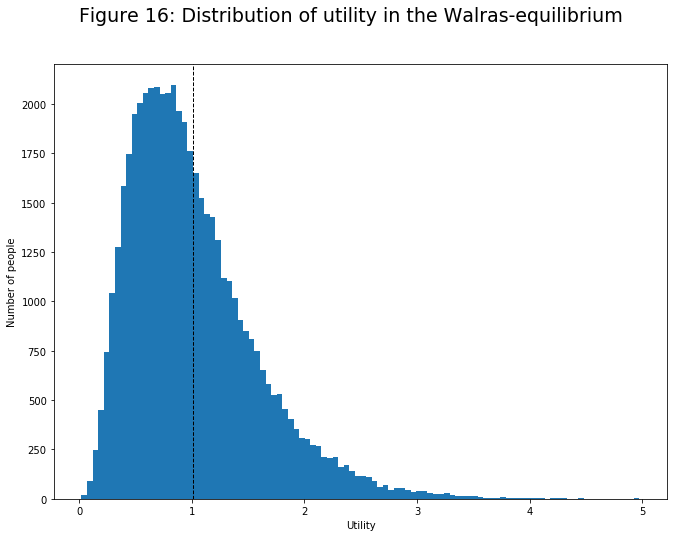

In [216]:
fig = plt.figure(figsize=(11,8))
plt.hist(utility,bins=100)
fig.suptitle('Figure 16: Distribution of utility in the Walras-equilibrium', fontsize=19)
plt.axvline(utility.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Utility')
plt.ylabel('Number of people')

In [217]:
mean = np.mean(utility)
var = np.var(utility)
print(f'The mean of the distribution is {mean:.3f} and the variance is {var:.3f}')

The mean of the distribution is 1.010 and the variance is 0.317


#### Question 5

In [218]:
# We copy the initial endowments:

e1_avg = e1.copy()
e2_avg = e2.copy()
e3_avg = e3.copy()

# Here we replace the new endowments with the average of the inital endowments:

for i,n in enumerate(e1):
    e1_avg[i] = e1.mean()
for i,n in enumerate(e2):
    e2_avg[i] = e2.mean()
for i,n in enumerate(e3):
    e3_avg[i] = e3.mean()

Here we find the equilibrium prices with the new endowments:

In [219]:
# Step 1: Initial guess:
p1 = 1
p2 = 1
epsilon = 1e-6
kappa = 0.5

p1,p2 = eq_finder(betas,p1,p2,e1_avg,e2_avg,e3_avg,kappa=0.5,eps=1e-6,maxiter=7500)

  0: p1 =   1.15443484 -> excess demand -> 46330.45322633
  0: p2 =   0.96321076 -> excess demand -> -11036.77294234
  1: p1 =   1.27685472 -> excess demand -> 36725.96313815
  1: p2 =   0.93659869 -> excess demand -> -7983.62083163
  2: p1 =   1.37961171 -> excess demand -> 30827.09694193
  2: p2 =   0.91833778 -> excess demand -> -5478.27168623
  3: p1 =   1.46887242 -> excess demand -> 26778.21126920
  3: p2 =   0.90696448 -> excess demand -> -3411.99200640
  4: p1 =   1.54826733 -> excess demand -> 23818.47424070
  4: p2 =   0.90121737 -> excess demand -> -1724.13206651
500: p1 =   5.93315437 -> excess demand ->   554.03181223
500: p2 =   2.41062773 -> excess demand ->   207.16645183
1000: p1 =   6.37364924 -> excess demand ->   104.82980595
1000: p2 =   2.57527414 -> excess demand ->    39.16838681
1500: p1 =   6.46189659 -> excess demand ->    22.17738553
1500: p2 =   2.60824444 -> excess demand ->     8.28518999
2000: p1 =   6.48076821 -> excess demand ->     4.79334756
2000: p2

We see that the equilibrium prices are found after 7.040 iterations and that the Walras-equilibrium prices are $(p_1,p_2)=(6.49,2.62)$, when the endowments are equally distributed. It is also seen, that these prices are very close to the equilibrium prices found with the inital endownments. 

In [220]:
utility = u(betas,p1,p2,e1_avg,e2_avg,e3_avg)

Text(0, 0.5, 'Number of people')

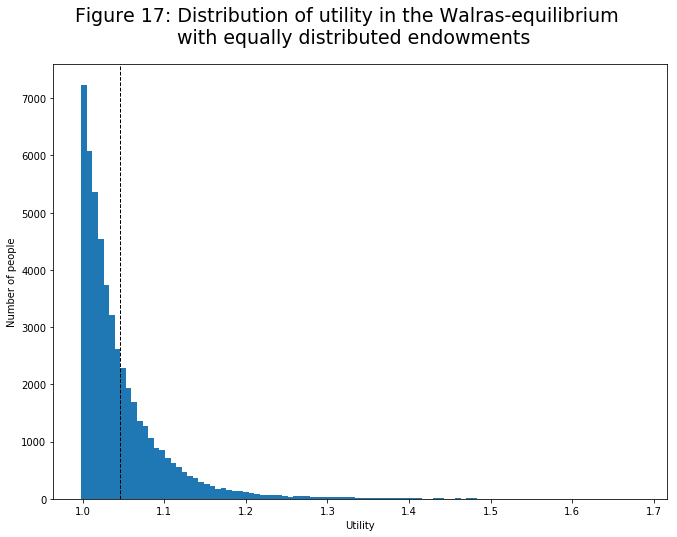

In [221]:
fig = plt.figure(figsize=(11,8))
plt.hist(utility,bins=100)
fig.suptitle('Figure 17: Distribution of utility in the Walras-equilibrium \n with equally distributed endowments', fontsize=19)
plt.axvline(utility.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Utility')
plt.ylabel('Number of people')

In [222]:
mean = np.mean(utility)
var = np.var(utility)
print(f'The mean of the distribution is {mean:.3f} and the variance is {var:.3f}')

The mean of the distribution is 1.046 and the variance is 0.003


It is seen, that equally distributed endowments only slightly change the mean, while the variance has fallen with a factor 100. This is due to everybody having the same endowments, which causes a lower variance of the distribution of utility in the Walras-equilibrium.

In [223]:
def v(betas,p1,p2,e1_avg,e2_avg,e3_avg,gamma):
    return (((demand_good_1_func(betas,p1,p2,e1_avg,e2_avg,e3_avg))**betas[:,0])*((demand_good_2_func(betas,p1,p2,e1_avg,e2_avg,e3_avg))**betas[:,1])*((demand_good_3_func(betas,p1,p2,e1_avg,e2_avg,e3_avg))**betas[:,2]))**gamma

In [224]:
# Here we check different gamma values:
gamma = np.linspace(0,1,20)

# Here we create two empty boxes:
mean = []
variance = []

for x in gamma:
    mean_v = v(betas,p1,p2,e1_avg,e2_avg,e3_avg,x).mean()
    variance_v = v(betas,p1,p2,e1_avg,e2_avg,e3_avg,x).var()
    
    mean.append(mean_v)
    variance.append(variance_v)

Plot of the mean and variance for each gamma:

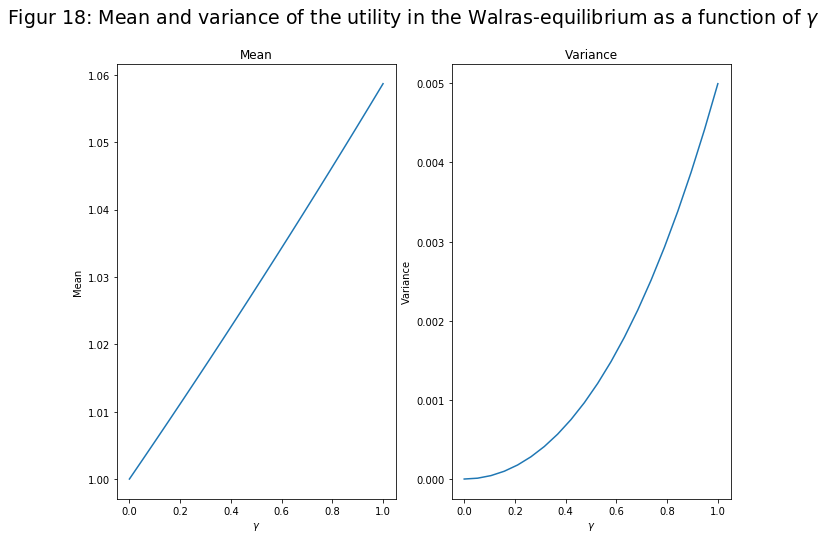

In [226]:
fig = plt.figure(figsize=(11,8))

# Below we invert the x_axis, as these point in the wrong direction.

fig.suptitle('Figur 18: Mean and variance of the utility in the Walras-equilibrium as a function of $\gamma$', fontsize=19)

ax1 = fig.add_subplot(1,2,1)
fig1 = ax1.plot(gamma,mean)
ax1.set_title('Mean')
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('Mean') 

ax2 = fig.add_subplot(1,2,2)
fig2 = ax2.plot(gamma,variance)
ax2.set_title('Variance')
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('Variance') 

plt.show()

In figure 18 we see, that when $\gamma$ increases, we have an increase in the mean and the variance of the utility distribution. That is, the distribution shifts to the rights, the greater $\gamma$ is.